In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel


X_train = np.load('initial_data/function_3/initial_inputs.npy')
Y_train = np.load('initial_data/function_3/initial_outputs.npy')

X_train = np.append(X_train, [[0.999999, 0.5,0.797978],[0.959595,0.05,0.424242],[2.42424e-01,5.00000e-02,9.00000e-06],
                              [0.009595,0.969696,0.858585]], axis=0)
Y_train = np.append(Y_train, [-0.0671101326201069,-0.092610115292593,-0.1872165089655,-0.0575040158619428])

print(X_train)
print(Y_train)

[[1.71525207e-01 3.43916870e-01 2.48737201e-01]
 [2.42114461e-01 6.44074270e-01 2.72432809e-01]
 [5.34905720e-01 3.98500915e-01 1.73388729e-01]
 [4.92581415e-01 6.11593188e-01 3.40176386e-01]
 [1.34621666e-01 2.19917240e-01 4.58206220e-01]
 [3.45523271e-01 9.41359831e-01 2.69363479e-01]
 [1.51836632e-01 4.39990619e-01 9.90881867e-01]
 [6.45502835e-01 3.97142940e-01 9.19771338e-01]
 [7.46911945e-01 2.84196309e-01 2.26299855e-01]
 [1.70476994e-01 6.97032401e-01 1.49169434e-01]
 [2.20549337e-01 2.97825244e-01 3.43555344e-01]
 [6.66013659e-01 6.71985151e-01 2.46295297e-01]
 [4.68089497e-02 2.31360241e-01 7.70617592e-01]
 [6.00097282e-01 7.25135725e-01 6.60886415e-02]
 [9.65994849e-01 8.61119690e-01 5.66829131e-01]
 [9.99999000e-01 5.00000000e-01 7.97978000e-01]
 [9.59595000e-01 5.00000000e-02 4.24242000e-01]
 [2.42424000e-01 5.00000000e-02 9.00000000e-06]
 [9.59500000e-03 9.69696000e-01 8.58585000e-01]]
[-0.1121222  -0.08796286 -0.11141465 -0.03483531 -0.04800758 -0.11062091
 -0.39892551 -

In [2]:
# Define the Gaussian Process
kernel = RBF(length_scale=[1.0, 1.0, 1.0]) + WhiteKernel(noise_level=0.1)
gp = GaussianProcessRegressor(kernel=kernel, alpha=0.01, normalize_y=True)
gp.fit(X_train, Y_train)

GaussianProcessRegressor(alpha=0.01,
                         kernel=RBF(length_scale=[1, 1, 1]) + WhiteKernel(noise_level=0.1),
                         normalize_y=True)

In [3]:
def ucb(X, gp, kappa=1.96):  # kappa can be adjusted based on your confidence level needs
    mean, std = gp.predict(X, return_std=True)
    return mean + kappa * std

# Define the range to test for each compound
test_range = np.linspace(0, 1, 100)
xx, yy, zz = np.meshgrid(test_range, test_range, test_range)
all_combinations = np.vstack([xx.ravel(), yy.ravel(), zz.ravel()]).T

# Calculate UCB for all combinations
UCB_values = ucb(all_combinations, gp)

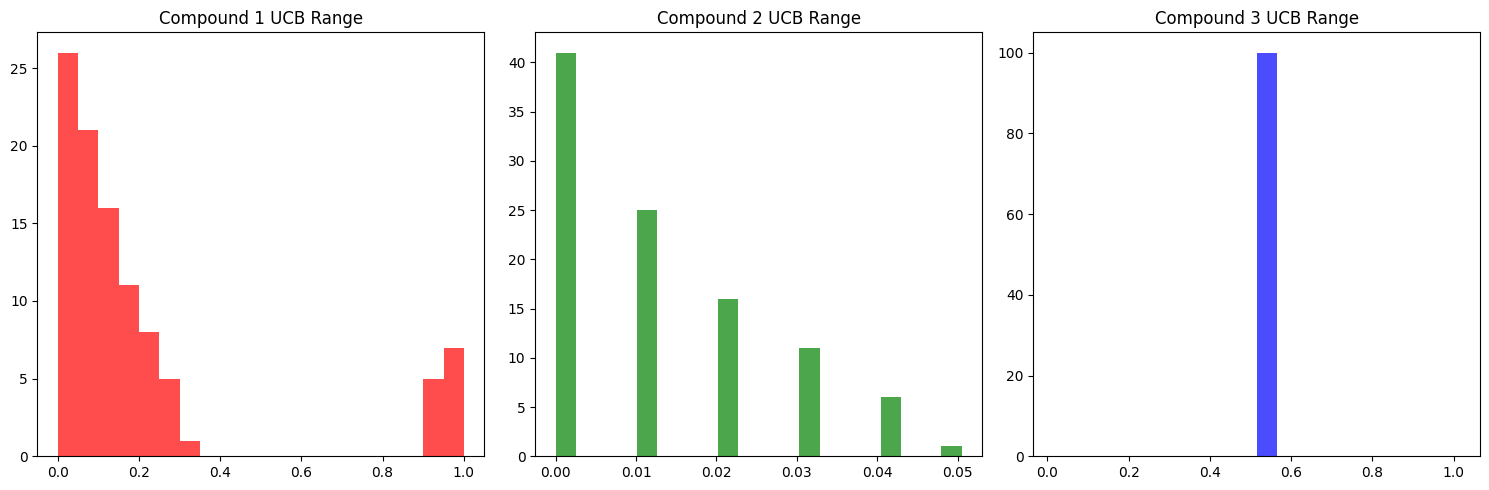

Estimated effective UCB ranges for each compound (5th to 95th percentile): [array([0.        , 0.97020202]), array([0.        , 0.04040404]), array([0.51515152, 0.51515152])]


In [4]:
# Find indices where UCB is maximized
max_ucb_idx = np.argsort(-UCB_values)[:100]  # Top 100 indices with maximum UCB
optimal_ranges_ucb = all_combinations[max_ucb_idx]

import matplotlib.pyplot as plt

# Plot histograms to determine the common UCB ranges for each compound
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
colors = ['red', 'green', 'blue']
for i in range(3):
    axes[i].hist(optimal_ranges_ucb[:, i], bins=20, color=colors[i], alpha=0.7)
    axes[i].set_title(f'Compound {i+1} UCB Range')

plt.tight_layout()
plt.show()

# Calculate range estimates for submission based on UCB
compound_ucb_range_estimates = [np.percentile(optimal_ranges_ucb[:, i], [5, 95]) for i in range(3)]
print("Estimated effective UCB ranges for each compound (5th to 95th percentile):", compound_ucb_range_estimates)
